In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats #import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.formula.api import ols

<img src="Statistical__tests.png" width=600 height=400 />

 <font size="5">***Interpret results***</font>

<img src="Null_hypothesis.png" width=600 height=400 />

### Load Data

In [2]:
# Load iris datset 
iris = sm.datasets.get_rdataset("iris").data
iris.columns = [s.replace('.', '_') for s in iris.columns]
iris.head(2)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### Group means

In [3]:
# Group means
means = iris.groupby("Species").mean().reset_index() 
means

,Species,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


*Do the population means of the groups all have the same value ? (separating each feature)*

### Group Stds 

In [4]:
# Group Stds (equal variances ?) 
stds = iris.groupby("Species").std().reset_index() 
stds

,Species,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,setosa,0.352490,0.379064,0.173664,0.105386
1,versicolor,0.516171,0.313798,0.469911,0.197753
2,virginica,0.635880,0.322497,0.551895,0.274650


### Plot Species Vs Sepal_Length

In [5]:
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

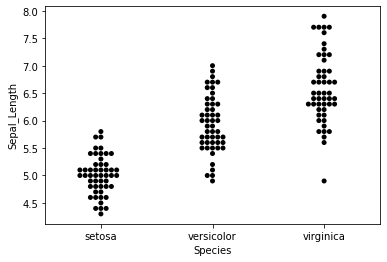

In [6]:
sns.swarmplot(x="Species", y="Sepal_Length", data=iris, color="black") ;
# sns.scatterplot(x="Species", y="Sepal_Length", data=iris, color="black") 

# Here, we visualize better using swarmplot than scatterplot

### Plot groups 

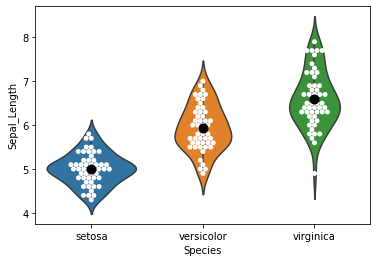

In [7]:
# Plot groups 
ax = sns.violinplot(x="Species", y="Sepal_Length", data=iris) 
ax = sns.swarmplot(x="Species", y="Sepal_Length", data=iris, color="white") 
ax = sns.swarmplot(x="Species", y="Sepal_Length", color="black", data=means, size=10)

# <font color='blue'> **(quantit ~ categorial (>=2 levels))**</font>

## Parametric <font color='red'> **ANOVA test**</font> -- Comparaison de moyennes

**Is there a difference in Petal Length in species from iris dataset ?**

### ANOVA -- Estimate means and variances

In [8]:
# ANOVA 
lm = ols('Sepal_Length ~ Species', data=iris).fit() 
sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame
                            # There are only two groups for the one-way ANOVA F-test

,sum_sq,df,F,PR(>F)
Species,63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


In [9]:
iris.shape

(150, 5)

This 𝐹-statistic follows the 𝐹-distribution with 𝐾 − 1 and 𝑁 − 𝐾 degrees of freedom under the null hypothesis.
* K denotes the number of groups, here K = 3
* N The number of observations, here N = 150

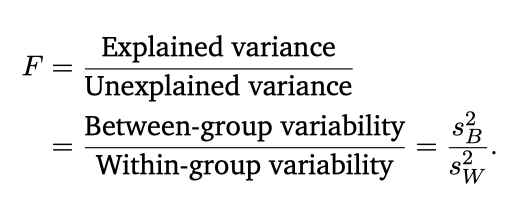

### **Interpret results**

In [10]:
res = sm.stats.anova_lm(lm, typ=2)
res

,sum_sq,df,F,PR(>F)
Species,63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


In [11]:
print('Statistics=%.3f, p=%.3f' % (res.F.Species, res['PR(>F)'].Species))
# interpret
alpha = 0.05
if res['PR(>F)'].Species > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=119.265, p=0.000
Different distribution (reject H0)


## <font color='red'>**Standard t-test**</font>

*Test whether two samples means are equal*

In [12]:
# Compute with scipy
Sep_L = iris[iris["Species"] == "setosa"]['Sepal_Length']
Sep_W = iris[iris["Species"] == "setosa"]['Sepal_Width']

Pet_L = iris[iris["Species"] == "setosa"]['Petal_Length']
Pet_W = iris[iris["Species"] == "setosa"]['Petal_Width']


stat, p = stats.ttest_ind(Sep_L, Sep_W, equal_var=True)
print('Parametric Standard t-test : Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Parametric Standard t-test : Statistics=21.556, p=0.000
Different distributions (reject H0)


In [13]:
height = np.array([ 1.83,  1.83,  1.73,  1.82,  1.83,  1.73,  1.99,  1.85,  1.68,  1.87,
                    1.66,  1.71,  1.73,  1.64,  1.70,  1.60,  1.79,  1.73,  1.62,  1.77])

grp = np.array(["M"] * 10 + ["F"] * 10)

# Compute with scipy
stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True)

Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)

## Non-Parametric <font color='red'> **Kruskal-Wallis H Test**</font>

The <font color='red'>**Kruskal-Wallis**</font>  test is a nonparametric version of the one-way analysis of variance test or **ANOVA** for short. It is named for the developers of the method, William Kruskal and Wilson Wallis. 
    
This test can be used to determine **whether more than two independent samples have a different distribution.** It can be thought of as the generalization of <font color='blue'>**the Mann-Whitney U**</font> test.

*Categorical target*

In [14]:
data = [iris.loc[ids, 'Sepal_Length'].values for ids in iris.groupby('Species').groups.values()]

In [15]:
# N.B :
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [16]:
data # Species : there are 3 classes 
# len(data) = 3
# data[0].shape ---> (50,)

[array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ]),
 array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
        6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
        6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
        5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7]),
 array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8,
        5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2,
        6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. ,
        6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])]

In [17]:
stat, p = stats.kruskal(*data)
print('Parametric Kruskal test : Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Parametric Kruskal test : Statistics=96.937, p=0.000
Different distributions (reject H0)


## Non-Parametric <font color='red'> **Friedman Test**</font>   rank-order


The <font color='red'>**Friedman test**</font>  is the nonparametric version of <font color='blue'> **the repeated measures**</font> analysis of variance test, or <font color='blue'> **repeated measures ANOVA.**</font>

The test can be thought of as a generalization of the **Kruskal-Wallis H Test** to more than two samples.

In [18]:
stat, p = stats.friedmanchisquare(*data)
print('Parametric Friedman test : Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Parametric Friedman test : Statistics=73.786, p=0.000
Different distributions (reject H0)


## Non-Parametric <font color='red'> **Mann-Whitney U**</font> 

We use the <font color='red'> **Mann-Whitney U test**</font>  to assess **whether there is a statistically significant difference in the diagnosis age of males and females.**

The <font color='blue'> **null hypothesis**</font> is that the distribution of male diagnosis ages is the same as the distribution of female diagnosis ages. 

We decide that a <font color='green'> **confidence level**</font> of 95% is required to reject the null hypothesis in favor of the alternative that that the distributions are different.

In [19]:
stat, p = stats.mannwhitneyu(*data[0:2]) ### Here, we only use the two first classes, to see how the test works
                                         #The test is used for 2 samples
    
print('Parametric Friedman test : Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Parametric Friedman test : Statistics=168.500, p=0.000
Different distributions (reject H0)


### Example

In [30]:
males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]

stat, pval = stats.mannwhitneyu(males, females, method="exact")
print("stats : ", stat, "  p : ", pval)

stats :  17.0   p :  0.1111111111111111


In [31]:
# interpret
alpha = 0.05
if pval > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Same distribution (fail to reject H0)


# <font color='green'> **Correlation**</font> <font color='blue'> **(quantit ~ quantit)**</font>

*Evaluation de la relation monotone <font color='red'> **(Spearman)**</font> ou linéaire <font color='red'> **(Pearson)**</font> entre deux variables continues*

Text(0, 0.5, 'sbp')

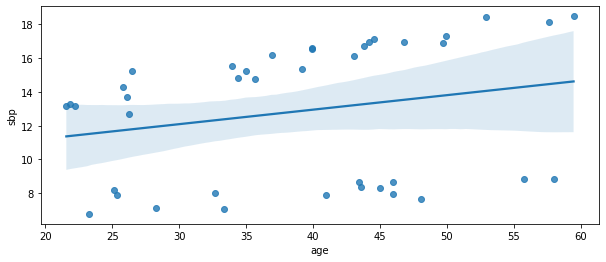

In [24]:
# Age uniform distribution between 20 and 40
age = np.random.uniform(20, 60, 40)

# Systolic blood presure, 2 groups:
# - 15 subjects at 0.05 * age + 6
# - 25 subjects at 0.15 * age + 10
sbp = np.concatenate((0.05 * age[:15] + 6, 0.15 * age[15:] + 10)) + \
    .5 * np.random.normal(size=40)

plt.figure(figsize = (10, 4))
sns.regplot(x=age, y=sbp)
plt.xlabel('age')
plt.ylabel('sbp')

The <font color='blue'>**p-value**</font>  is the probability to observe a value 𝑡 more extreme than the observed one 𝑡 𝑜𝑏𝑠 under the null hypothesis 𝐻0 : 𝑃(𝑡 > 𝑡 𝑜𝑏𝑠 |𝐻 0 )

## Non-Parametric <font color='red'> **Spearman**</font>   rank-order

In [25]:
# Non-Parametric Spearman 
stat, pval = stats.spearmanr(age, sbp)
print("Non-Parametric Spearman, cor: %.4f, pval: %.4f" % (stat, pval))

Non-Parametric Spearman, cor: 0.4079, pval: 0.0090


In [26]:
# interpret
alpha = 0.05
if pval > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Different distribution (reject H0)


The <font color='red'> **Spearman correlation**</font> is a non-parametric measure of the monotonicity of the relationship between two datasets.

**When to use it?** Observe the data distribution: 
* presence of <font color='green'> **outliers**</font>
* the distribution of the residuals is <font color='green'> **not Gaussian.**</font>

### Based on Iris Data

In [34]:
# Parametric Pearson cor test 
stat, pval = stats.spearmanr(iris['Petal_Length'], iris['Sepal_Length'])
print("Non-Parametric Spearman, stat: %.4f, pval: %.4f" % (stat, pval))

# interpret
alpha = 0.05
if pval > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Non-Parametric Spearman, stat: 0.8819, pval: 0.0000
Different distribution (reject H0)


## Parametric <font color='red'> **Pearson**</font> 

In [28]:
# Parametric Pearson cor test 
stat, pval = stats.pearsonr(age, sbp)
print("Parametric Pearson, stat: %.4f, pval: %.4f" % (stat, pval))

Parametric Pearson, stat: 0.2330, pval: 0.1479


In [29]:
# interpret
alpha = 0.05
if pval > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Same distribution (fail to reject H0)


### Based on Iris Data

In [33]:
# Parametric Pearson cor test 
stat, pval = stats.pearsonr(iris['Petal_Length'], iris['Sepal_Length'])
print("Parametric Pearson, stat: %.4f, pval: %.4f" % (stat, pval))

# interpret
alpha = 0.05
if pval > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Parametric Pearson, stat: 0.8718, pval: 0.0000
Different distribution (reject H0)


# <font color='blue'> **Comparing two related samples**</font>

In [ ]:
#(quantit ~ cte)

## Non-Parametric <font color='red'> **Wilcoxon**</font>  signed-rank test

***Echantillons indépendants ou appariés***

In [ ]:
n = 20 
# Buisness Volume time 0 
bv0 = np.random.normal(loc=3, scale=.1, size=n) 
# Buisness Volume time 1 
bv1 = bv0 + 0.1 + np.random.normal(loc=0, scale=.1, size=n)

# create an outlier 
bv1[0] -= 10

# Paired t-test 
print(stats.ttest_rel(bv0, bv1))

# Wilcoxon 
print(":::  :::::  :::: ")
stat, pval = stats.wilcoxon(bv0, bv1)

print("Non-Parametric Wilcoxon test, stat: %.4f, pval: %.4f" % (stat, pval))

In [ ]:
# interpret
alpha = 0.05
if pval > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

The <font color='red'> **Wilcoxon signed-rank test**</font>  is a non-parametric statistical hypothesis test used when comparing two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is equivalent to one-sample test of the difference of paired samples.

It can be used as **an alternative to** the <font color='green'> **paired Student’s 𝑡-test**</font> , 𝑡-test for matched pairs, or the 𝑡test for dependent samples when the population **cannot be assumed to be normally distributed.**

**When to use it?** Observe the data distribution: 
* presence of outliers
* the distribution of the residuals is not Gaussian

It has a lower sensitivity compared to <font color='blue'> **𝑡-test.**</font> May be problematic to use when the sample size is small.

# <font color='green'> **Correlation**</font> <font color='blue'> **(categorial ~ categorial)**</font> 

## <font color='red'> **Chi-square, 𝜒2**</font>  

In [ ]:
# Dataset:

# 20 samples:

# 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)
print("exposed Dataset: ", exposed)

print("---------------")
# 8 first with cancer, 10 without, the last two with.
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)
print("cancer Dataset:  ", cancer)
print("---------------")


crosstab = pd.crosstab(exposed, cancer, rownames=['exposed'], colnames=['cancer'])
print("Observed table:")
print(crosstab)

pd.DataFrame(crosstab)

In [ ]:
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("Chi2 = %f, pval = %.4f" % (chi2, pval))
print("---------------")
print("Expected table:")
print(expected)
print("---------------")


In [ ]:
# interpret
alpha = 0.05
if pval > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

In [ ]:
# Compute expected cross-table based on proportion
exposed_marg = crosstab.sum(axis=0) 
exposed_freq = exposed_marg / exposed_marg.sum()

cancer_marg = crosstab.sum(axis=1)
cancer_freq = cancer_marg / cancer_marg.sum()

print('Exposed frequency? Yes: %.2f' % exposed_freq[0], 'No: %.2f' % exposed_freq[1]) 
print('Cancer frequency? Yes: %.2f' % cancer_freq[0], 'No: %.2f' % cancer_freq[1])
print("---------------")

print('Expected frequencies:') 
print(np.outer(exposed_freq, cancer_freq))
print("---------------")

print('N=', len(exposed), ', Expected cross-table (frequencies * N): ') 
print(np.outer(exposed_freq, cancer_freq) * len(exposed))

In [ ]:
len(exposed)

# <font><span background='yellow'>Application : Choose the good test from Dataset</span></font>

In [36]:
results_control_accuracy = pd.DataFrame(
    [0.9333333359824286, 0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 
     0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9555555568801032, 0.9777777791023254,
     0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.6000000052981906, 0.9777777791023254, 
     0.9777777791023254, 0.9777777791023254, 0.9111111124356588, 0.9777777791023254, 0.9777777791023254, 
     0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9555555568801032,
     0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9111111124356588])

results_experimental_accuracy = pd.DataFrame(
    [0.9111111124356588, 0.9555555568801032, 0.9555555568801032, 0.9777777791023254, 0.9777777791023254, 
     0.9777777791023254, 0.9555555568801032, 0.933333334657881, 0.9777777791023254, 0.9777777791023254, 
     0.9777777791023254, 0.9555555568801032, 0.9777777791023254, 0.933333334657881, 0.9777777791023254, 
     0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9777777791023254,
     0.9777777791023254, 0.9777777791023254, 0.9333333359824286, 0.9777777791023254, 0.9777777791023254, 
     0.9333333359824286, 0.9777777791023254, 0.9555555568801032, 0.9777777791023254, 0.9777777791023254])

results_control_accuracy.shape, results_experimental_accuracy.shape

((30, 1), (30, 1))

## Visualize Data

In [41]:
results_accuracy= pd.concat([results_control_accuracy, results_experimental_accuracy], axis=1)
results_accuracy.columns = ['Control', 'Experimental']

results_accuracy.head(3)

,Control,Experimental
0,0.933333,0.911111
1,0.977778,0.955556
2,0.977778,0.955556


## Plots

<AxesSubplot:>

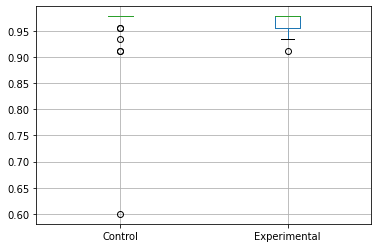

In [42]:
results_accuracy.boxplot()

#We can remove the outlier from view and get a better look, using showfliers
#results_accuracy.boxplot(showfliers=False)

(2,)


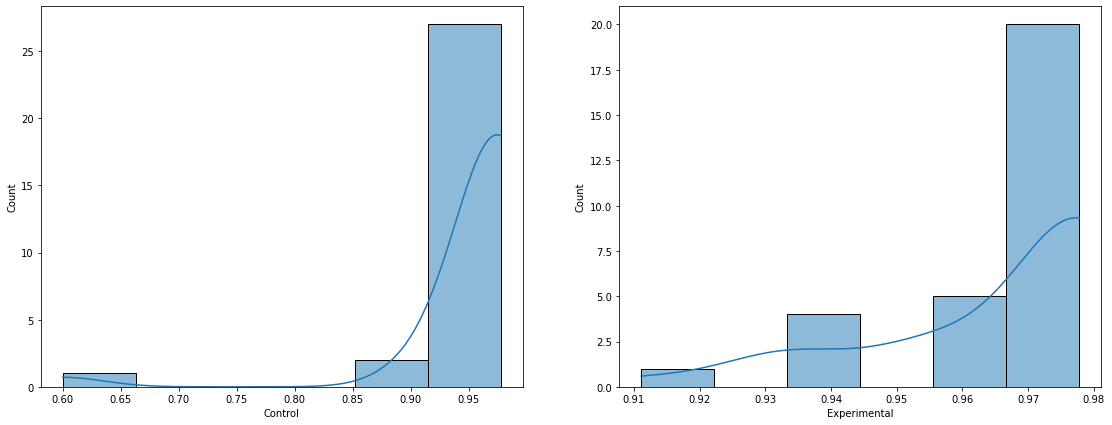

In [78]:
# Destructuring initialization
fig, axes = plt.subplots(1, 2, figsize=(19,7)) # axs is a (1,2) nd-array


print(axes.shape)
# First subplot
sns.histplot(data = results_accuracy, x = "Control", kde = True,  ax=axes[0]);
sns.histplot(data = results_accuracy, x = "Experimental", kde = True, ax=axes[1]);


## Compare the mean performance (Control Vs. experimental)

In [79]:
mean_control_accuracy = results_control_accuracy.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

mean_experimental_accuracy = results_experimental_accuracy.mean()
print("Mean Experimental Accuracy: {}".format(mean_experimental_accuracy))

print("---------------     ---------------    ---------------    ---------------   ---------------")

std_control_accuracy = results_control_accuracy.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))

std_experimental_accuracy = results_experimental_accuracy.std()
print("Standard Deviation of Experimental Accuracy Results: {}".format(std_experimental_accuracy))


Mean Control Accuracy: 0    0.957778
dtype: float64
Mean Experimental Accuracy: 0    0.965926
dtype: float64
---------------     ---------------    ---------------    ---------------   ---------------
Standard Deviation of Control Accuracy Results: 0    0.070115
dtype: float64
Standard Deviation of Experimental Accuracy Results: 0    0.019119
dtype: float64


## Normality Test

In [80]:
alpha = 0.05;

s, p = stats.normaltest(results_control_accuracy)
if p < alpha:
  print('Control data is not normal')
else:
  print('Control data is normal')

s, p = stats.normaltest(results_experimental_accuracy)
if p < alpha:
  print('Experimental data is not normal')
else:
  print('Experimental data is normal')

Control data is not normal
Experimental data is not normal


**So, we use The non Parametric Wilcoxon test**

## Choose the suitable Statistical test 

In [82]:
s, p = stats.wilcoxon(results_control_accuracy[0], results_experimental_accuracy[0])

if p > 0.05:
    print('Null hypothesis accepted, no significant difference between the data-sets')
else:
    print('Null hypothesis rejected, significant difference between the data-sets')

Null hypothesis accepted, no significant difference between the data-sets


# <span style='background:yellow'>Application 2: Choose the good test from Dataset</span>

In [85]:
data = pd.read_csv('brain_size.csv', 
                   delimiter=';', index_col=0, na_values='.')
data.head(2)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121


In [86]:
data.shape

(40, 7)

In [87]:
data.Gender.value_counts()

Female    20
Male      20
Name: Gender, dtype: int64

In [92]:
# make a groupby object on the dataframe
groupby_gender = data.groupby('Gender')
groupby_gender.mean().reset_index()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
1,Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


## 1 sample t-Student test 

In [95]:
# runa 1 sample t-test
stat, pval = stats.ttest_1samp(data['VIQ'], 0)

print('Parametric 1 sample t-Student test : Statistics=%.3f, p=%.3f' % (stat, p))

Parametric 1 sample t-Student test : Statistics=30.088, p=0.726


## 2 samples t-Student test 

In [96]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']

stat, pval = stats.ttest_ind(female_viq, male_viq)
print('Parametric 2 samples t-Student test : Statistics=%.3f, p=%.3f' % (stat, p))

Parametric 2 samples t-Student test : Statistics=-0.773, p=0.726


## Paired tests: repeated measurements on the same indivuals

We can first look if FSIQ and PIQ are different using the 2-sample t-test.

In [98]:
stat, pval = stats.ttest_ind(data['FSIQ'], data['PIQ'])

print('1 sample t-test : Statistics=%.3f, p=%.3f' % (stat, p))

1 sample t-test : Statistics=0.466, p=0.726


1 sample t-test  doesn't account for individual differences contributing to variance in data.

We can use a paired t-test or repeated measures test to account for these individual differences.

In [99]:
stat, pval = stats.ttest_rel(data['FSIQ'], data['PIQ'])

print('Paired test : Statistics=%.3f, p=%.3f' % (stat, p))

Paired test : Statistics=1.784, p=0.726


In [100]:
####   NB  ########
stat, pval = stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)
print('1-sample t-test on the difference of the two measures : Statistics=%.3f, p=%.3f' % (stat, p))

1-sample t-test on the difference of the two measures : Statistics=1.784, p=0.726


**These tests assume normality in the data. A non-parametric alternative is the Wilcoxian signed rank test**

In [101]:
stat, pval = stats.wilcoxon(data['FSIQ'], data['PIQ'])
print("Non-Parametric Wilcoxon test, stat: %.4f, pval: %.4f" % (stat, pval))

Non-Parametric Wilcoxon test, stat: 274.5000, pval: 0.1066


**Note: The corresponding test in the non paired case is the Mann–Whitney U test, scipy.stats.mannwhitneyu().**